In [2]:
#
# Chapter 9
# Chromatography
#

In [4]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [42]:
# rate using backward difference for dc/dz
def ratefn_bd(t, y, cf_in, gamma, K, L, e, Pe, phi, nz):
    
    # get c and q from y vector
    ym = y.reshape((nz, 2))
    c = ym[:, 0]
    q = ym[:, 1]
    
    dz = L / (nz + 1.0)
    
    # isotherm relation
    qe = gamma * c / (1.0 + K * c)
    
    # rate of each species at each grid point in liquid phase
    
    dc = np.zeros(nz)
    # rate at internal grid points
    for i in range(1, nz - 1):
        dc[i] = -(c[i] - c[i - 1]) / dz + (1.0 / Pe) * (c[i + 1] - 2 * c[i] + c[i - 1]) / dz**2 - (1 - e) / e * phi * (qe[i] - q[i])
    
    # rate at outlet edge grid
    i = nz - 1
    dc[i] = -(c[i] - c[i - 1]) / dz + (1.0 / Pe) * (c[i] - 2 * c[i] + c[i - 1]) / dz**2 - (1 - e) / e * phi * (qe[i] - q[i])
    
    # rate at inlet edge grid
    i = 0
    cin = cf_in
    dc[i] = -(c[i] - cin) / dz + (1 / Pe) * (c[i + 1] - 2 * c[i] + cin) / dz**2 - (1 - e) / e * phi * (qe[i] - q[i])
    
    # rate at solid adsorbent
    dq = np.zeros(nz)
    for i in range(nz):
        dq[i] = phi * (qe[i] - q[i])
    
    # combine dc and dq vector into dy vector
    dy = np.column_stack((dc, dq)).reshape(2 * nz,)
        
    return dy

In [136]:
# rate using central difference for dc/dz
def ratefn_cd(t, y, cf_in, gamma, K, L, e, Pe, phi, nz):
    
    # get c and q from y vector
    ym = y.reshape((nz, 2))
    c = ym[:, 0]
    q = ym[:, 1]
    
    dz = L / (nz + 1.0)
    
    # isotherm relation
    qe = gamma * c / (1.0 + K * c)
    
    # rate of each species at each grid point in liquid phase
    
    dc = np.zeros(nz)
    # rate at internal grid points
    for i in range(1, nz - 1):
        dc[i] = -(c[i + 1] - c[i - 1]) / (2 * dz) + (1.0 / Pe) * (c[i + 1] - 2 * c[i] + c[i - 1]) / dz**2 - (1 - e) / e * phi * (qe[i] - q[i])
    
    # rate at outlet edge grid
    i = nz - 1
    dc[i] = -(c[i] - c[i - 1]) / (2 * dz) + (1.0 / Pe) * (c[i] - 2 * c[i] + c[i - 1]) / dz**2 - (1 - e) / e * phi * (qe[i] - q[i])
    
    # rate at inlet edge grid
    i = 0
    cin = cf_in
    dc[i] = -(c[i + 1] - cin) / (2 * dz) + (1 / Pe) * (c[i + 1] - 2 * c[i] + cin) / dz**2 - (1 - e) / e * phi * (qe[i] - q[i])
    
    # rate at solid adsorbent
    dq = np.zeros(nz)
    for i in range(nz):
        dq[i] = phi * (qe[i] - q[i])
    
    # combine dc and dq vector into dy vector
    dy = np.column_stack((dc, dq)).reshape(2 * nz,)
        
    return dy

In [145]:
L = 2
Pe = 1000  # u*L/D
phi = 1000 # km*L/u
gamma = 0.1
K = 2
e = 0.4
cf_in = 0
nz = 200

In [146]:
dz = L / (nz + 1)
z = np.arange(0, nz * dz, dz)
#print(z), print(len(z))
c0 = np.zeros(nz)
c0[(z >= 0.25) & (z <= 0.75)] = 1
#c0

In [147]:
q0 = gamma * c0 / (1.0 + K * c0)
#print(q0)

In [148]:
y0 = np.column_stack((c0, q0)).reshape (2 * nz, )

In [149]:
ratefn_l = lambda t, y: ratefn_cd(t, y, cf_in, gamma, K, L, e, Pe, phi, nz)

In [150]:
ysol = solve_ivp(ratefn_l, [0, 1], y0, method = 'LSODA', t_eval = np.arange(0.0, 1.1, 0.1), lband = 4, uband = 4)

In [151]:
ysolm = ysol.y.reshape((nz, 2, -1))
print(ysolm.shape)
ysol_c = ysolm[:, 0, :]
ysol_q = ysolm[:, 1, :]

(200, 2, 11)


Text(0, 0.5, 'c')

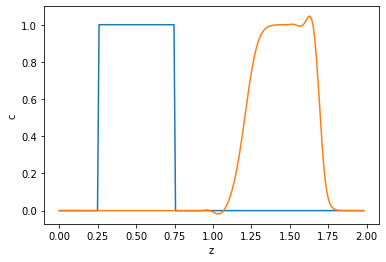

In [152]:
# Plot c
plt.plot(z, ysol_c[:, [0, 10]])
plt.xlabel('z')
plt.ylabel('c')